# scatter

Example scatterplots with Formula 1 data from
https://ergast.com/mrd/db

In [1]:
%load_ext autoreload
%autoreload 2
%autosave 0

from etl import DATADIR, ErgastF1
from viz import Plot

f1 = ErgastF1(DATADIR / 'ergast/f1.zip')
plot = Plot()

Autosave disabled


## How fast are the cars compared to previous years?
Get fastest lap for each (year, circuit, driver) when available.

In [2]:
fastlaps = (
    f1.results.dropna(subset=['fastlap_kph'])
    .rename(columns={'fastlap_kph': 'kph'})
    .join(f1.races['date id_circuit'.split()], on='id_race')
    .join(f1.circuits['circuit'], on='id_circuit')
    .join(f1.teams['team'], on='id_team')
    ['date circuit team fastlap kph'.split()]
    .sort_values('date kph'.split())
    .reset_index(drop=True)
)
fastlaps['year'] = fastlaps.pop('date').dt.year
fastlaps

,circuit,team,fastlap,kph,year
0,Albert Park Grand Prix Circuit,Minardi,8,210.666,2004
1,Albert Park Grand Prix Circuit,Minardi,10,211.741,2004
2,Albert Park Grand Prix Circuit,Jordan,15,215.659,2004
3,Albert Park Grand Prix Circuit,McLaren,7,217.098,2004
4,Albert Park Grand Prix Circuit,Jaguar,6,217.336,2004
...,...,...,...,...,...
6217,Yas Marina Circuit,Red Bull,55,197.731,2019
6218,Yas Marina Circuit,Ferrari,44,199.064,2019
6219,Yas Marina Circuit,Ferrari,55,199.688,2019
6220,Yas Marina Circuit,Mercedes,31,200.515,2019


In [3]:
def dots(circuit, team, color, **kwargs):
    data = fastlaps.loc[fastlaps['circuit'].eq(circuit)].copy()
    data['size'] = 32 + 96 * data['team'].eq(team)
    data['color'] = data['team'].map({team: color}).fillna('grey')
    data = data['year kph color size'.split()]
    
    kwset = kwargs.setdefault
    kwset('colorbar', None)
    kwset('title', f"fastest lap for each driver at {circuit}") 
    kwset('ylim', (160, 260))
    plot.scatter(data, **kwargs)

## giro volante

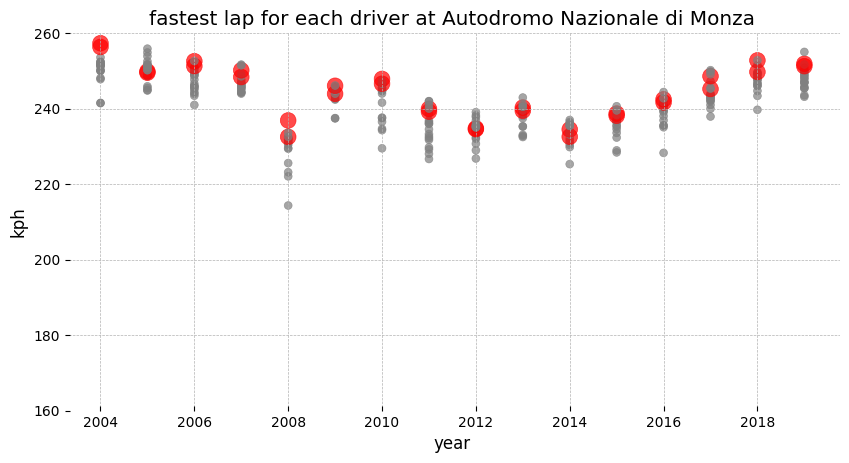

In [4]:
dots('Autodromo Nazionale di Monza', 'Ferrari', 'red')

## running of the bulls

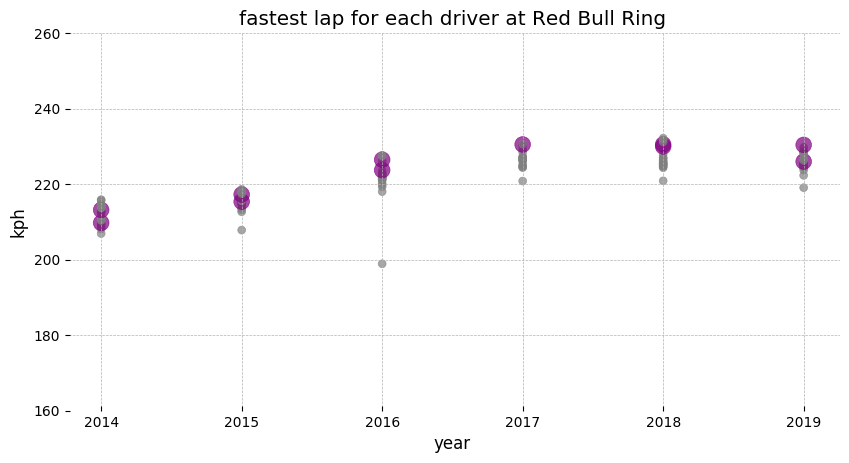

In [5]:
dots('Red Bull Ring', 'Red Bull', 'purple')

## geschwindigkeitheim

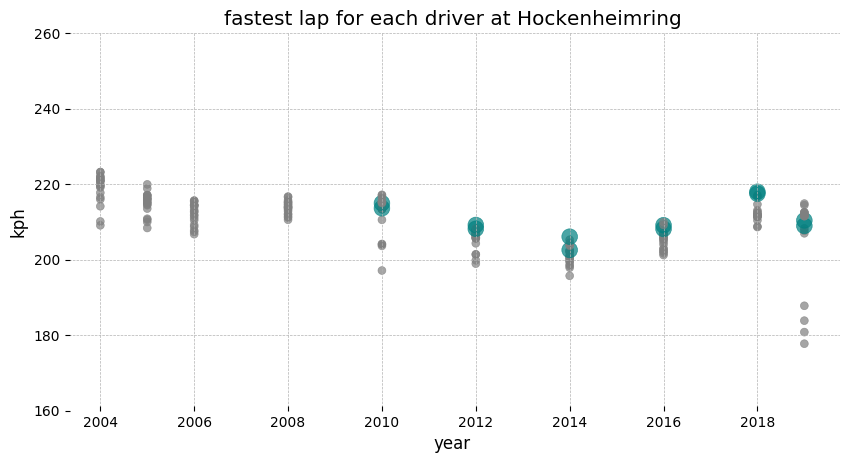

In [6]:
dots('Hockenheimring', 'Mercedes', 'teal')